In [2]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [39]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [67]:
#get stock price
df = web.DataReader('GOOGL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [68]:
df.shape

(587, 6)

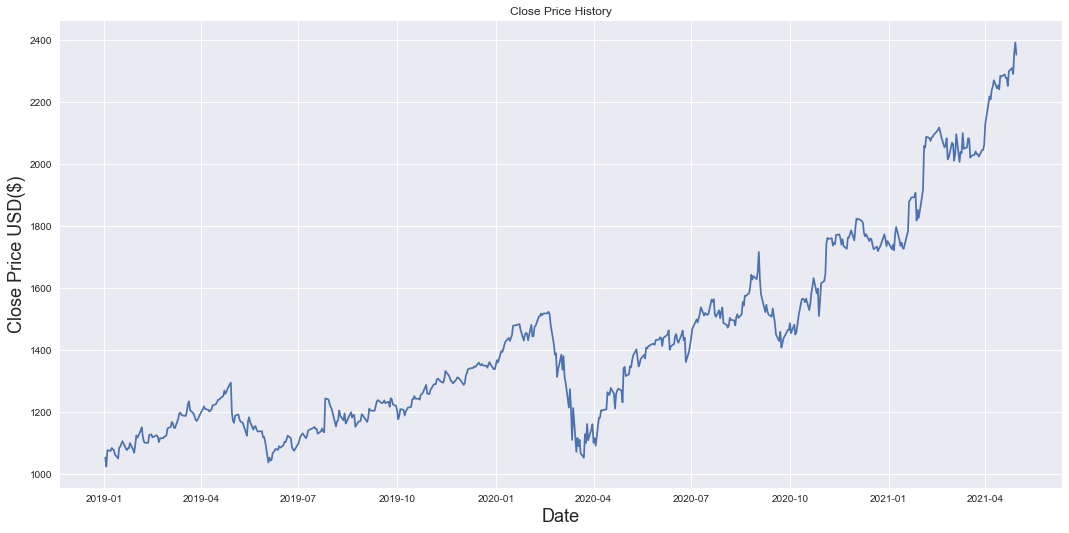

In [69]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [70]:
#create df with just close price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#get number of rows to train model
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

470

In [71]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data 

In [72]:
#Create training data set

#create scaled training data set
train_data = scaled_data[0:training_data_len , :]

#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.02136349, 0.        , 0.03847024, 0.03689786, 0.0438093 ,
       0.04108861, 0.03902609, 0.02852358, 0.019045  , 0.04464308,
       0.0468372 , 0.05386569, 0.05984837, 0.03887985, 0.04310721,
       0.04280733, 0.05561369, 0.03977943, 0.03261202, 0.05303924,
       0.07344458, 0.06812748, 0.08480284, 0.09244566, 0.07125046,
       0.05883175, 0.05624998, 0.05605981, 0.07468056, 0.07544854,
       0.07586538, 0.06886617, 0.07389803, 0.06956826, 0.05758836,
       0.0666209 , 0.06718398, 0.07060685, 0.07125046, 0.07392731,
       0.08999557, 0.09357932, 0.10511301, 0.10200467, 0.09169964,
       0.09105603, 0.11247799, 0.1256354 , 0.12695923, 0.12218334,
       0.12055239, 0.11927248, 0.12944583, 0.14697692, 0.15407121,
       0.1332417 , 0.12573048, 0.12021589, 0.11156378, 0.1073657 ])]
[0.11074464058052791]



In [73]:
#convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [74]:
#Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape


(410, 60, 1)

In [48]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [75]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
410/410 [==============================] - 13s 24ms/step - loss: 0.0026
Epoch 2/100
410/410 [==============================] - 10s 24ms/step - loss: 0.0012
Epoch 3/100
410/410 [==============================] - 9s 23ms/step - loss: 7.6806e-04
Epoch 4/100
410/410 [==============================] - 10s 25ms/step - loss: 8.5414e-04
Epoch 5/100
410/410 [==============================] - 10s 24ms/step - loss: 6.1685e-04
Epoch 6/100
410/410 [==============================] - 10s 24ms/step - loss: 6.0921e-04
Epoch 7/100
410/410 [==============================] - 10s 24ms/step - loss: 8.0908e-04
Epoch 8/100
410/410 [==============================] - 10s 24ms/step - loss: 5.5046e-04
Epoch 9/100
410/410 [==============================] - 9s 22ms/step - loss: 5.8811e-04
Epoch 10/100
410/410 [==============================] - 11s 26ms/step - loss: 7.0674e-04
Epoch 11/100
410/410 [==============================] - 10s 23ms/step - loss: 4.8887e-04
Epoch 12/100
410/410 [==================

410/410 [==============================] - 14s 34ms/step - loss: 4.6117e-04
Epoch 93/100
410/410 [==============================] - 17s 43ms/step - loss: 4.0640e-04
Epoch 94/100
410/410 [==============================] - 17s 42ms/step - loss: 5.9076e-04
Epoch 95/100
410/410 [==============================] - 11s 27ms/step - loss: 4.7603e-04
Epoch 96/100
410/410 [==============================] - 10s 24ms/step - loss: 4.2391e-04
Epoch 97/100
410/410 [==============================] - 13s 31ms/step - loss: 5.0289e-04
Epoch 98/100
410/410 [==============================] - 12s 30ms/step - loss: 5.3075e-04
Epoch 99/100
410/410 [==============================] - 14s 33ms/step - loss: 4.7810e-04
Epoch 100/100
410/410 [==============================] - 11s 26ms/step - loss: 4.2025e-04


In [77]:
#Create testing dataset
test_data = scaled_data[training_data_len - 60:, :]
#Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [78]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [79]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [80]:
#Get predicted prices valuse
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [81]:
#Get (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

2.9252147185496793

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


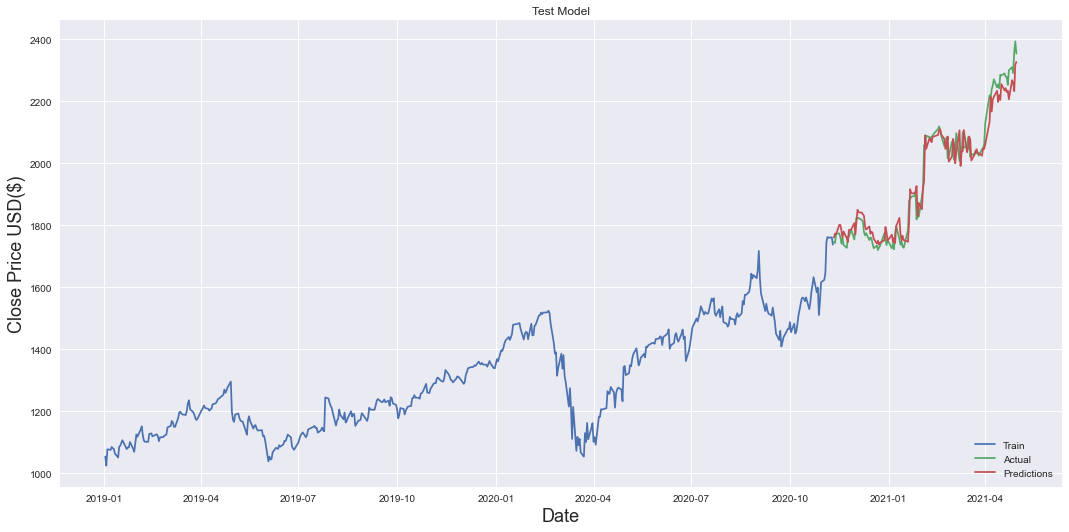

In [84]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

 #Visualization
plt.figure(figsize=(16,8))
plt.title('Test Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [89]:
#see valid predicted prices
valid[58:70]

,Close,Predictions
Date,,
2021-02-05,2088.830078,2046.776611
2021-02-08,2084.520020,2080.585693
2021-02-09,2075.389893,2075.310791
2021-02-10,2086.479980,2068.157715
2021-02-11,2088.750000,2085.728027
2021-02-12,2095.030029,2086.350342
2021-02-16,2110.699951,2091.070312
2021-02-17,2118.620117,2106.247070
2021-02-18,2105.810059,2110.008789


In [96]:
#get quote
google_quote = web.DataReader('Googl', data_source='yahoo', start='2019-01-01', end='2021-04-21')

new_df= apple_quote.filter(['Close'])
#Check last 60 days
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert X_test data set to numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2234.026]]


In [93]:
google_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2021-04-22', end='2021-04-22')

print(google_quote2['Close'])

Date
2021-04-22    2252.52002
Name: Close, dtype: float64


AttributeError: 'Sequential' object has no attribute 'score'